# 1. Library:

### 1.1. Data Manupulation

In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


### 1.2. Plotting graphs

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1.3 Machine learning

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy.stats import norm

### 1.4 Data fetching

In [5]:
import pandas_datareader as web
import datetime as dt

# 2. Targeted data

In [6]:
start=dt.datetime(2010,1,1)
end=dt.datetime(2019,11,11)

### 2.1 Dataframe (S&P 500)

In [7]:
df=web.DataReader('SPY','yahoo',start,end)

In [8]:
df=df.resample('7D').mean()
df=df.dropna()
df=df.iloc[:,:-1]
del df['Volume']
df.head()

,High,Low,Open,Close
Date,,,,
2010-01-04,114.002000,112.926001,113.308000,113.886000
2010-01-11,114.851999,113.689999,114.444000,114.316002
2010-01-18,113.897497,111.804998,113.254999,112.464998
2010-01-25,110.202002,108.382002,109.589999,108.973999
2010-02-01,109.209999,107.378000,108.566000,108.474001


### 2.2 Adding variables

In [9]:
df['m10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['m10'])
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df['EMA'] = df['Close'].ewm(span=10).mean()
df['ROC'] = ((df['Close'] - df['Close'].shift(-1))/df['Close'].shift(-1))*100


In [10]:
X=df.dropna()
X.head()

,High,Low,Open,Close,m10,Corr,Open-Close,Open-Open,EMA,ROC
Date,,,,,,,,,,
2010-05-10,116.928001,114.934001,115.884000,115.864000,117.69500,0.257754,0.106000,-0.886000,116.952947,4.427139
2010-05-17,112.355998,109.398000,111.227998,110.952000,117.29800,-0.216907,-4.636002,-4.656001,115.841785,2.197742
2010-05-24,109.650002,107.293999,108.388000,108.566000,116.51440,-0.342284,-2.564000,-2.839998,114.499062,-0.258618
2010-05-31,110.169998,107.730001,108.922501,108.847500,115.71775,-0.334211,0.356500,0.534500,113.458922,1.349652
2010-06-07,108.350000,105.964001,107.212000,107.398001,114.71955,-0.125469,-1.635500,-1.710501,112.345920,-3.651272


In [11]:
#X=XY[['m10','EMA','Corr','Open-Close','Open-Open','ROC']]

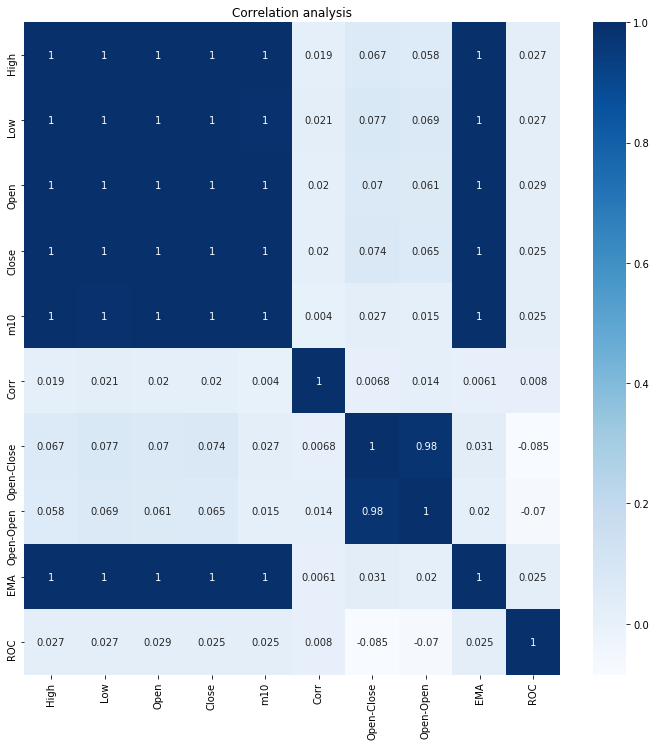

In [12]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = X.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [13]:
print(X)

                  High         Low        Open       Close         m10  \
Date                                                                     
2010-05-10  116.928001  114.934001  115.884000  115.864000  117.695000   
2010-05-17  112.355998  109.398000  111.227998  110.952000  117.298000   
2010-05-24  109.650002  107.293999  108.388000  108.566000  116.514400   
2010-05-31  110.169998  107.730001  108.922501  108.847500  115.717750   
2010-06-07  108.350000  105.964001  107.212000  107.398001  114.719550   
2010-06-14  112.020000  110.622000  111.265999  111.468001  113.976750   
2010-06-21  110.475999  108.518001  110.120001  109.100002  112.858550   
2010-06-28  105.523999  103.264000  104.845999  103.984000  111.173350   
2010-07-05  106.465000  104.434999  105.224998  106.025002  109.798251   
2010-07-12  109.535999  107.912000  108.951999  108.736002  109.094051   
2010-07-19  109.153999  107.186000  107.908000  108.542001  108.361851   
2010-07-26  111.660001  110.050002  11

# 3. Define Y (the classes): 

If Closing of t+1 > closing of t, Y = 1. If not, Y = -1



In [16]:
#3. Put vector Y in the dataframe for comparisons and check that works

df1=df.dropna()
print(df1)


                  High         Low        Open       Close         m10  \
Date                                                                     
2010-05-10  116.928001  114.934001  115.884000  115.864000  117.695000   
2010-05-17  112.355998  109.398000  111.227998  110.952000  117.298000   
2010-05-24  109.650002  107.293999  108.388000  108.566000  116.514400   
2010-05-31  110.169998  107.730001  108.922501  108.847500  115.717750   
2010-06-07  108.350000  105.964001  107.212000  107.398001  114.719550   
2010-06-14  112.020000  110.622000  111.265999  111.468001  113.976750   
2010-06-21  110.475999  108.518001  110.120001  109.100002  112.858550   
2010-06-28  105.523999  103.264000  104.845999  103.984000  111.173350   
2010-07-05  106.465000  104.434999  105.224998  106.025002  109.798251   
2010-07-12  109.535999  107.912000  108.951999  108.736002  109.094051   
2010-07-19  109.153999  107.186000  107.908000  108.542001  108.361851   
2010-07-26  111.660001  110.050002  11

In [17]:
print(X)

                  High         Low        Open       Close         m10  \
Date                                                                     
2010-05-10  116.928001  114.934001  115.884000  115.864000  117.695000   
2010-05-17  112.355998  109.398000  111.227998  110.952000  117.298000   
2010-05-24  109.650002  107.293999  108.388000  108.566000  116.514400   
2010-05-31  110.169998  107.730001  108.922501  108.847500  115.717750   
2010-06-07  108.350000  105.964001  107.212000  107.398001  114.719550   
2010-06-14  112.020000  110.622000  111.265999  111.468001  113.976750   
2010-06-21  110.475999  108.518001  110.120001  109.100002  112.858550   
2010-06-28  105.523999  103.264000  104.845999  103.984000  111.173350   
2010-07-05  106.465000  104.434999  105.224998  106.025002  109.798251   
2010-07-12  109.535999  107.912000  108.951999  108.736002  109.094051   
2010-07-19  109.153999  107.186000  107.908000  108.542001  108.361851   
2010-07-26  111.660001  110.050002  11

### 3.1 Include Y in df

In [18]:
Y = np.where (df1['Close'].shift(-1) > df1['Close'],1,-1)

print(Y)

[-1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1
  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1
 -1  1  1  1 -1  1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1 -1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1 -1  1  1  1  1 -1
  1  1  1 -1  1 -1  1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1
 -1 -1  1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1
  1 -1 -1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1
 -1 -1 -1  1  1  1  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1  1
 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1
  1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1
 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1
  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1 -1 -1
  1 -1  1  1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1

In [19]:
len(Y)

496

# 4. SPLITTING THE DATASET

Train: Learn from the data to generate predictions

Test: Test learning on new unseen data 




In [20]:
split = int(0.7*len(df1))

X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515 entries, 2010-01-04 to 2019-11-11
Freq: 7D
Data columns (total 10 columns):
High          515 non-null float64
Low           515 non-null float64
Open          515 non-null float64
Close         515 non-null float64
m10           506 non-null float64
Corr          497 non-null float64
Open-Close    514 non-null float64
Open-Open     514 non-null float64
EMA           515 non-null float64
ROC           514 non-null float64
dtypes: float64(10)
memory usage: 44.3 KB


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2010-05-10 to 2019-11-04
Freq: 7D
Data columns (total 10 columns):
High          496 non-null float64
Low           496 non-null float64
Open          496 non-null float64
Close         496 non-null float64
m10           496 non-null float64
Corr          496 non-null float64
Open-Close    496 non-null float64
Open-Open     496 non-null float64
EMA           496 non-null float64
ROC           496 non-null float64
dtypes: float64(10)
memory usage: 42.6 KB


### 4.1 Checking the sample

In [23]:
length=[]

length.append(len(X_train))
length.append(len(Y_train))
length.append(len(X_test))
length.append(len(Y_test))

print(length)

[347, 347, 149, 149]


In [24]:
print(X_test)

                  High         Low        Open       Close         m10  \
Date                                                                     
2017-01-02  226.727501  225.217499  225.864998  226.357502  221.140250   
2017-01-09  227.154001  225.934000  226.595999  226.720004  222.799650   
2017-01-16  226.972500  225.770000  226.597496  226.412502  223.901301   
2017-01-23  228.752002  227.563998  228.131998  228.324002  224.929101   
2017-01-30  228.408002  226.990005  227.823999  227.962000  225.651551   
2017-02-06  230.220001  229.085999  229.486002  229.844000  226.615551   
2017-02-13  234.434003  233.076001  233.397998  234.239999  227.660351   
2017-02-20  236.729996  235.577499  235.970005  236.487503  228.674302   
2017-02-27  238.552002  237.336002  237.885999  238.010001  229.899501   
2017-03-06  237.758002  236.499997  237.373999  237.164001  231.152151   
2017-03-13  238.342001  237.170001  237.843997  237.833997  232.299801   
2017-03-20  235.991998  233.902005  23

# 5. THE MODEL



### 5.1 Creating the model

In [25]:
model = LogisticRegression()

modell = model.fit (X_train,Y_train)


/Users/inigo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 5.2 Estimation of coeficients

Interpretation: (-1,22) For every 1$ of increase in the Opening price in T, the fact of having the Closing of T+1 > closing of T is LESS probable

In [26]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,High,[0.053173176815418756]
1,Low,[-0.3332404249133414]
2,Open,[0.04383128171207462]
3,Close,[0.25903318565329453]
4,m10,[0.18097599230207512]
5,Corr,[0.05996377569344978]
6,Open-Close,[0.019646014951708913]
7,Open-Open,[-0.04442237670006952]
8,EMA,[-0.20794146712089473]
9,ROC,[-5.0959795674537105]


In [27]:
print("Parameters:", model.coef_, model.intercept_)


Parameters: [[ 0.05317318 -0.33324042  0.04383128  0.25903319  0.18097599  0.05996378
   0.01964601 -0.04442238 -0.20794147 -5.09597957]] [0.46006614]


### 5.3 Predicting class probabilities of the model:
[0,2 . 0,8] would mean that the model estimates that in the sample in X_test has a 80% of probability that the closing of the next day would be higher than the closing of that day



In [28]:
probability = model.predict_proba(X_test)
print(probability)

[[3.39447594e-01 6.60552406e-01]
 [6.96144957e-01 3.03855043e-01]
 [1.48781283e-02 9.85121872e-01]
 [6.99234703e-01 3.00765297e-01]
 [1.41735017e-02 9.85826498e-01]
 [7.16535238e-05 9.99928346e-01]
 [7.83805312e-03 9.92161947e-01]
 [4.25654949e-02 9.57434505e-01]
 [8.87233245e-01 1.12766755e-01]
 [2.24730257e-01 7.75269743e-01]
 [9.99388224e-01 6.11775559e-04]
 [1.70370321e-01 8.29629679e-01]
 [5.16388987e-01 4.83611013e-01]
 [9.02647019e-01 9.73529814e-02]
 [4.18470409e-01 5.81529591e-01]
 [2.57479285e-04 9.99742521e-01]
 [1.80608028e-01 8.19391972e-01]
 [2.32864328e-01 7.67135672e-01]
 [9.40796425e-01 5.92035751e-02]
 [5.84747405e-03 9.94152526e-01]
 [2.56812620e-02 9.74318738e-01]
 [1.35356097e-01 8.64643903e-01]
 [5.23054941e-01 4.76945059e-01]
 [7.28370445e-01 2.71629555e-01]
 [9.26358832e-01 7.36411683e-02]
 [6.97579305e-01 3.02420695e-01]
 [2.49543099e-02 9.75045690e-01]
 [4.01898785e-03 9.95981012e-01]
 [2.22244165e-01 7.77755835e-01]
 [5.30068481e-01 4.69931519e-01]
 [9.268612

In [48]:
len(probability)

149

### 5.4  Predicting the class of model with only 1 outcome:

[1] would mean that as the probability of the closing price of tomorrow is higher than todays taken above 




In [29]:

predicted = modell.predict(X_test)
print(predicted)

[ 1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1
 -1 -1  1  1  1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1 -1  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  1  1
 -1  1  1 -1 -1  1  1  1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1
 -1 -1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
  1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1
  1  1  1  1  1]


In [30]:
score= model.score(X_test, Y_test)
print(score)

0.9731543624161074


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2010-05-10 to 2019-11-04
Freq: 7D
Data columns (total 10 columns):
High          496 non-null float64
Low           496 non-null float64
Open          496 non-null float64
Close         496 non-null float64
m10           496 non-null float64
Corr          496 non-null float64
Open-Close    496 non-null float64
Open-Open     496 non-null float64
EMA           496 non-null float64
ROC           496 non-null float64
dtypes: float64(10)
memory usage: 42.6 KB


In [32]:
len(predicted)

149

In [33]:
len(Y_test)

149

# 6. Evaluating the model

### 6.1 Predictions vs actual data analysis


In [34]:
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': predicted})



In [35]:
print(df2)

     Actual  Predicted
0         1          1
1        -1         -1
2         1          1
3        -1         -1
4         1          1
5         1          1
6         1          1
7         1          1
8        -1         -1
9         1          1
10       -1         -1
11        1          1
12       -1         -1
13       -1         -1
14        1          1
15        1          1
16        1          1
17        1          1
18       -1         -1
19        1          1
20        1          1
21        1          1
22        1         -1
23       -1         -1
24       -1         -1
25       -1         -1
26        1          1
27        1          1
28        1          1
29        1         -1
..      ...        ...
119       1          1
120       1          1
121      -1         -1
122      -1         -1
123      -1         -1
124      -1         -1
125       1          1
126       1          1
127       1          1
128      -1         -1
129       1          1
130       1


### 6.2 Classification report
    
   -) Precision: number of true positives over the number of true 
    positives plus the number of false positives.
    
   -) Recall: number of true positives over the number of true 
    positives plus the number of false negatives.
    
   -) F1: weighted average of the precision and recall
    F1 = 2 * (precision * recall) / (precision + recall)

In [36]:
print(metrics.classification_report(Y_test, predicted))


              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        56
           1       0.98      0.98      0.98        93

    accuracy                           0.97       149
   macro avg       0.97      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149



### 6.3 Confusion matrix

  To describe the performance of classification model on a set of test dataset for which the true values are known. We will calculate the confusion matrix using ‘confusion_matrix’ function.

In [37]:
print(metrics.confusion_matrix(Y_test, predicted))


[[54  2]
 [ 2 91]]


### 6.4 The score of the model

Accuracy = nº of correct predictions / number of predictions

Tested on the test dataset obviously

In [38]:
score= model.score(X_test, Y_test)
print(score)

0.9731543624161074


### 6.5 K-Fold Cross validation test

   -) Method:
    
   1. Randomly split your entire dataset into k”folds” (k=10)
   2. For 1st fold in your dataset, build your model on rest 9 folds of the dataset. Then, test the model to check the accuracy for the 1st fold
   3. Record the error accuracy you see on each of the predictions
   4. Repeat this until each of the k-folds has served as the test set
   5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model
    
    *Note: Lower values of K is more biased and higher value of K is less biased but more volatile

In [39]:
cross_val = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)

print(cross_val)

print(cross_val.mean())

[1.         1.         0.98039216 1.         1.         0.97959184
 1.         0.97959184 1.         0.97959184]
0.9919167667066826


/Users/inigo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/inigo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/inigo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/inigo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/inigo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

# 7. Conclusions

### 7.1 Def. predicted signal
    
   

In [40]:
df1['Predicted_Signal'] = model.predict(X)

/Users/inigo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 7.2 Def. SP500 returns 

Relative returns: Variation (%) between closing of tomorrow vs closing of today



In [41]:
df1['SP500_returns'] = np.log(df1['Close']/df1['Close'].shift(1))

/Users/inigo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
print(X)

                  High         Low        Open       Close         m10  \
Date                                                                     
2010-05-10  116.928001  114.934001  115.884000  115.864000  117.695000   
2010-05-17  112.355998  109.398000  111.227998  110.952000  117.298000   
2010-05-24  109.650002  107.293999  108.388000  108.566000  116.514400   
2010-05-31  110.169998  107.730001  108.922501  108.847500  115.717750   
2010-06-07  108.350000  105.964001  107.212000  107.398001  114.719550   
2010-06-14  112.020000  110.622000  111.265999  111.468001  113.976750   
2010-06-21  110.475999  108.518001  110.120001  109.100002  112.858550   
2010-06-28  105.523999  103.264000  104.845999  103.984000  111.173350   
2010-07-05  106.465000  104.434999  105.224998  106.025002  109.798251   
2010-07-12  109.535999  107.912000  108.951999  108.736002  109.094051   
2010-07-19  109.153999  107.186000  107.908000  108.542001  108.361851   
2010-07-26  111.660001  110.050002  11

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515 entries, 2010-01-04 to 2019-11-11
Freq: 7D
Data columns (total 10 columns):
High          515 non-null float64
Low           515 non-null float64
Open          515 non-null float64
Close         515 non-null float64
m10           506 non-null float64
Corr          497 non-null float64
Open-Close    514 non-null float64
Open-Open     514 non-null float64
EMA           515 non-null float64
ROC           514 non-null float64
dtypes: float64(10)
memory usage: 44.3 KB


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2010-05-10 to 2019-11-04
Freq: 7D
Data columns (total 12 columns):
High                496 non-null float64
Low                 496 non-null float64
Open                496 non-null float64
Close               496 non-null float64
m10                 496 non-null float64
Corr                496 non-null float64
Open-Close          496 non-null float64
Open-Open           496 non-null float64
EMA                 496 non-null float64
ROC                 496 non-null float64
Predicted_Signal    496 non-null int64
SP500_returns       495 non-null float64
dtypes: float64(11), int64(1)
memory usage: 50.4 KB


In [45]:
print(df1)

                  High         Low        Open       Close         m10  \
Date                                                                     
2010-05-10  116.928001  114.934001  115.884000  115.864000  117.695000   
2010-05-17  112.355998  109.398000  111.227998  110.952000  117.298000   
2010-05-24  109.650002  107.293999  108.388000  108.566000  116.514400   
2010-05-31  110.169998  107.730001  108.922501  108.847500  115.717750   
2010-06-07  108.350000  105.964001  107.212000  107.398001  114.719550   
2010-06-14  112.020000  110.622000  111.265999  111.468001  113.976750   
2010-06-21  110.475999  108.518001  110.120001  109.100002  112.858550   
2010-06-28  105.523999  103.264000  104.845999  103.984000  111.173350   
2010-07-05  106.465000  104.434999  105.224998  106.025002  109.798251   
2010-07-12  109.535999  107.912000  108.951999  108.736002  109.094051   
2010-07-19  109.153999  107.186000  107.908000  108.542001  108.361851   
2010-07-26  111.660001  110.050002  11

In [46]:
df1['Strategy_returns'] = df1['SP500_returns']* df1['Predicted_Signal'].shift(1)

/Users/inigo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/inigo/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


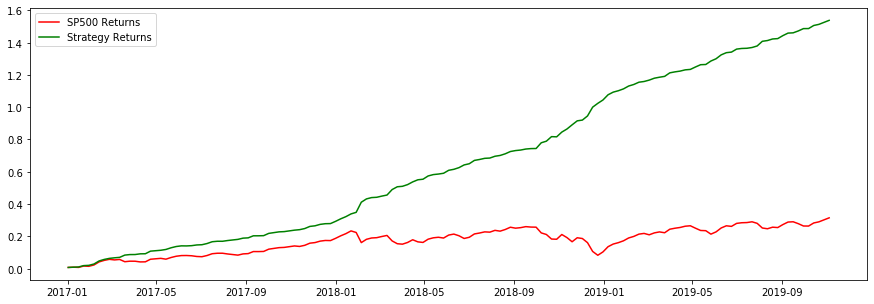

In [47]:
Cumulative_Nifty_returns = np.cumsum(df1[split:]['SP500_returns'])
Cumulative_Strategy_returns = np.cumsum(df1[split:]['Strategy_returns'])
plt.figure(figsize=(15,5) )
plt.plot(Cumulative_Nifty_returns, color='r',label = 'SP500 Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()